## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [22]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=10000, n_redundant=0, n_features=2, 
                    n_clusters_per_class=1, weights=[0.90], random_state=12
                   )


In [23]:
import pandas as pd
import numpy as np

In [24]:
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
df = pd.concat([df1, df2], axis=1)
df

,f1,f2,target
0,1.029600,-1.235937,0
1,-0.735233,-1.094894,0
2,-0.007200,-1.127353,0
3,-1.228777,-1.094613,0
4,-1.429518,-1.183838,0
...,...,...,...
9995,-1.803765,-0.772698,0
9996,-0.407858,-0.981406,0
9997,-0.057637,-0.896451,0
9998,-0.437405,-0.834415,0


In [25]:
df['target'].value_counts()

0    8961
1    1039
Name: target, dtype: int64

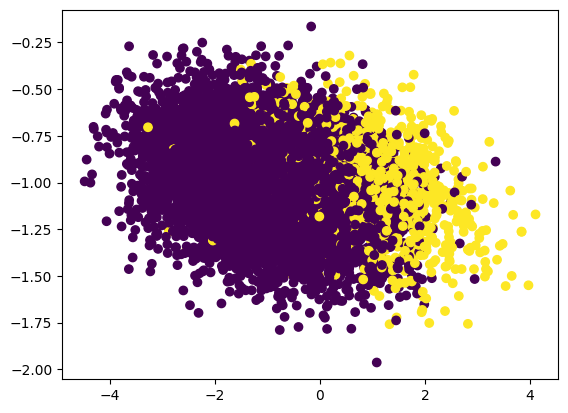

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c=df["target"])

In [28]:
!pip install imblearn

     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/226.0 kB ? eta -:--:--
     - --------------------------------

In [31]:
from imblearn.over_sampling import SMOTE

# Transforming the datasets 

In [33]:
oversample = SMOTE()
X,y = oversample.fit_resample(df[['f1','f2']],df.target)

In [36]:
X.shape, y.shape

((17922, 2), (17922,))

,f1,f2
0,1.029600,-1.235937
1,-0.735233,-1.094894
2,-0.007200,-1.127353
3,-1.228777,-1.094613
4,-1.429518,-1.183838
...,...,...
17917,0.934153,-1.110048
17918,0.963632,-0.524158
17919,0.967059,-1.005310
17920,1.028190,-0.774194


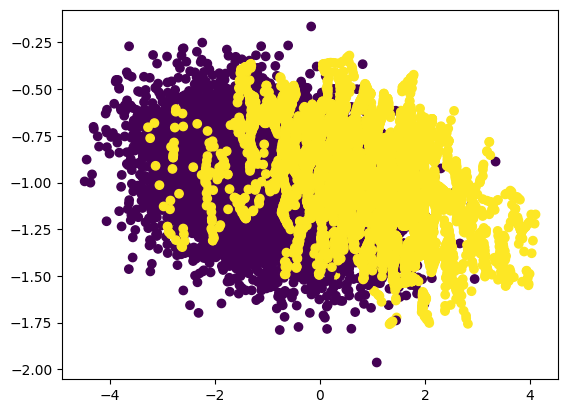

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X['f1'], X['f2'],c=y)

# Data Interpolation

## Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

#  1. Linear Interpolation

In [44]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

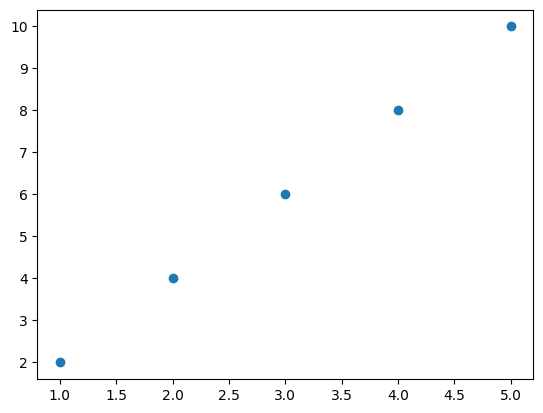

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [46]:
## interpolate the data using linear interpolation
x_new=np.linspace(1,5,10) ## create new x values
y_interp=np.interp(x_new,x,y)

In [47]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

# Cubic Interpolation With Scipy

In [48]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [49]:
from scipy.interpolate import interp1d

In [50]:
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [51]:
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)

In [52]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

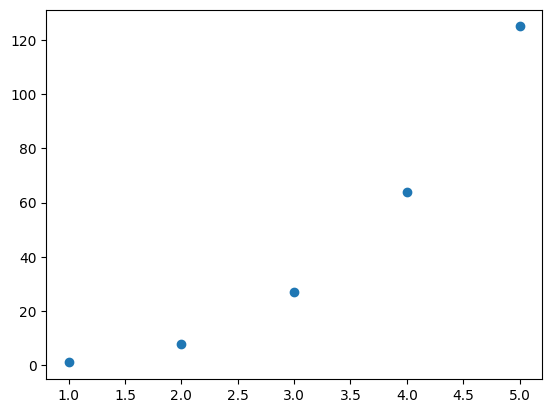

In [53]:
plt.scatter(x,y)

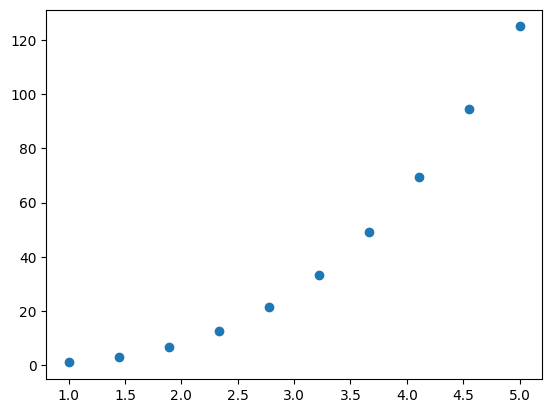

In [54]:
plt.scatter(x_new,y_interp)

#  3. Polynomial Interpolation

In [55]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [56]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [57]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

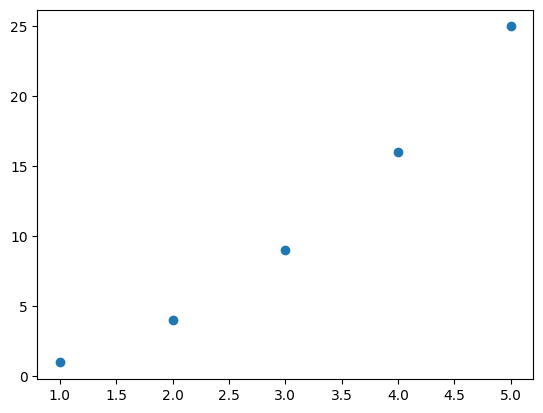

In [58]:
plt.scatter(x,y)

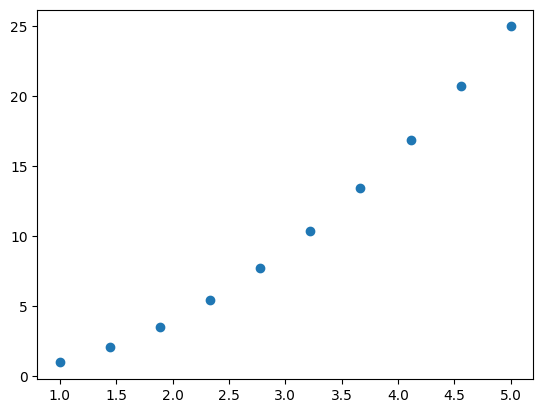

In [59]:
plt.scatter(x_new,y_interp)